# Portfolio Methodolgy

1. DGI - Rebalance every 6 months picking around 10 - 30 names from CA and US universe
    - Add names slowly, 2-3 names a month
    - GTC Stop Limit of 3% on each name
2. VAA/PAA - Rebalance every month on trading day 1
3. LEAPS - Rebalance every 3 months picking around 3 - 8 names from US universe (high growth potential names)
    - Current Holdings: MU AMD MSFT TTWO
    - AMD Earnings: Oct 22
    - MSFT Earnings: Oct 24
    - TTWO Earnings: Nov 5
    - MU Earnings: Dec 17
4. Short Vol - Short SPX Spreads at the beginning of the month and hold until second or last week to maturity
    - Potentially long UVXY/VXX puts at beginning of the month with bracket orders
5. Barbell Hedging
    - Long SPX puts or VIX calls during high crisis potential moments
        - Initiate bracket orders with SPX Puts: +/- 30% of Cost Basis
    - Check VIX Futures volume trends and see impact of Feb 5, 2018
    - Only trade 4 naked SPX puts in Reg accounts
        - Sell half into profits/losses 
    - Only trade 6 3:1 Put back ratios in Reg Account: Leg into these positions because of how illiquid the market is
    - Take losses immediately (10% - 30% of Cost Basis)
    - NEVER EVER try to put on a position of the market is illiquid: YOU WILL get filled at horrible prices
    - **Put on 1-5 Delta strangles on the open of the day and close position at the end of the day around 2 pm to 3 pm**
6. Treasuries - Re-establish monthly bills beginning of month or at maturity

##### Strategy Weights
|Strategy|Weight|Last Rebal|Next Check|Next Full Rebal|
|-|-|-|-|-|
|DGI|15%|10/01/2018|11/01/2018|1/2/2019|
|VAA/PAA|15%|10/01/2018|11/01/2018|11/01/2018|
|LEAPs|1.5%|10/4/2018|10/22/2018|12/1/2018|
|Short Vol|2%|10/4/2018|10/5/2018|10/12/2018|
|Barbell Hedging|1.5%||||
|Treasuries|60%|10/4/2018|10/24/2018|10/5/2018|

In [1]:
# Importing necessary models
import smtplib
import pandas as pd
import numpy as np
import datetime as dt
import pandas.stats.moments as st
import time
%matplotlib inline
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

import os
main_dir = os.getcwd()

os.chdir('C:\\Users\\Fang\\Desktop\\Python Trading\\Trading\\Trading\\Modules\\DataCollection')

from alphavantage import *
from yahoo_query import *
from option_slam_earnings import *

os.chdir('C:\\Users\\Fang\\Desktop\\Python Trading\\Trading\\Trading\\Modules\\Options')
from optionsFunctions import *

os.chdir('C:\\Users\\Fang\\Desktop\\Python Trading\\Trading\\Trading\\Modules\\Earnings')
from yahoo_earnings import *

os.chdir(main_dir)

# Allocate Smartly Checking

In [ ]:
# Short Call Assignment Price - 287.5

portfolio_value =  200000

as_lst = ['DBC',
        'HYG',
        'IEF',
        'IWM',
        'LQD',
        'QQQ',
        'SPY',
        'VNQ']
as_wgt = [0.014,
        0.014,
        0.417,
        0.014,
        0.500,
        0.014,
        0.014,
        0.014]

as_df = pd.DataFrame({'Allocation': as_wgt}, index = as_lst)
curr_spot = curr_batch_quotes(as_lst)
as_df = pd.concat([as_df,curr_spot[['price']]], axis = 1)

as_df['Market Value'] = portfolio_value*as_df.Allocation
as_df['Holdings'] = np.round(as_df['Market Value']/as_df.price,0)

as_df

## Checking market correlations

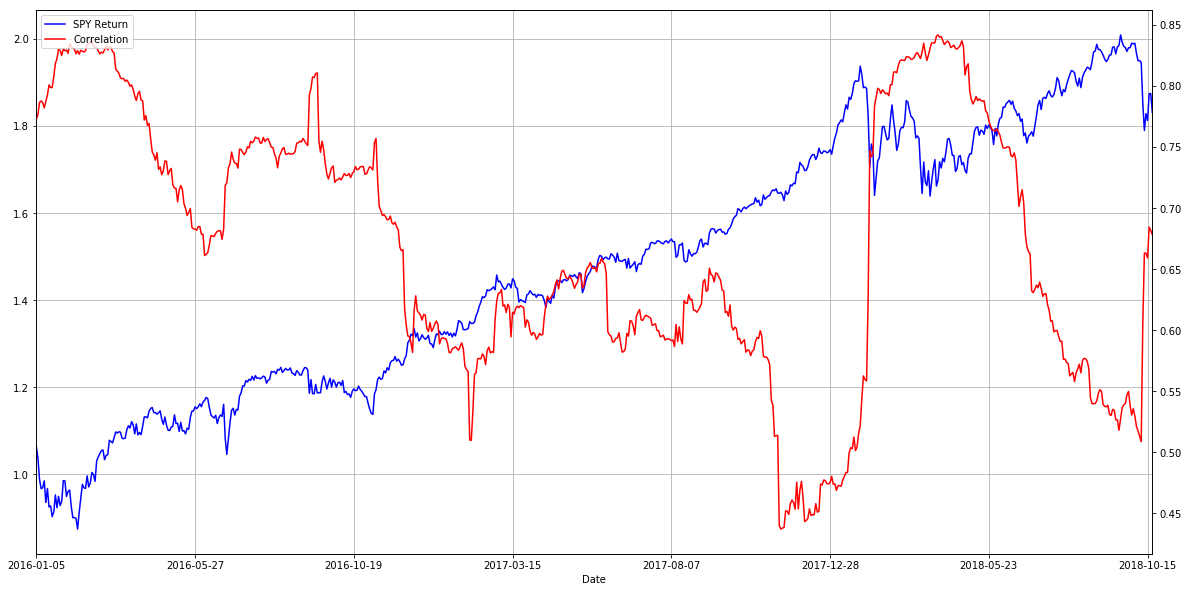

                XLRE       XLV       XLI       XLK       XLP       XLE  \
2018-10-12  0.492820  0.889005  0.769311  0.871457  0.512850  0.625010   
2018-10-15  0.478333  0.890293  0.761975  0.871014  0.500660  0.628712   
2018-10-16  0.532334  0.907499  0.780780  0.886814  0.536781  0.621229   
2018-10-17  0.537344  0.905306  0.775341  0.885260  0.535126  0.615506   
2018-10-18  0.506440  0.908218  0.784038  0.888416  0.516324  0.607627   

                 XLU       XLB       XLY       XLF  Avg_Corr   SPY_cum  
2018-10-12  0.234899  0.640646  0.872420  0.722024  0.663044  1.828443  
2018-10-15  0.225269  0.639786  0.870967  0.724222  0.659123  1.812556  
2018-10-16  0.272353  0.667870  0.883684  0.754350  0.684369  1.874055  
2018-10-17  0.269248  0.663802  0.884840  0.744730  0.681650  1.874568  
2018-10-18  0.250069  0.666094  0.891610  0.763298  0.678213  1.830903  


In [2]:
rolling_window = 60
plot_window = 10000

corr_df, sector_df = check_mkt_corr(rolling_window, plot_window)
print(corr_df.tail())

In [13]:
((sector_df.dropna() + 1).cumprod()-1).tail()

,SPY,XLRE,XLV,XLI,XLK,XLP,XLE,XLU,XLB,XLC,XLY,XLF
2018-10-12,0.001633,-0.021905,0.073179,0.009149,-0.00840,0.025852,-0.023281,0.054991,-0.080869,-0.071857,-0.029522,-0.033638
2018-10-15,-0.003993,-0.015873,0.065755,0.011061,-0.02464,0.032119,-0.031442,0.059972,-0.083946,-0.075460,-0.031759,-0.038026
2018-10-16,0.017786,0.002540,0.094980,0.028131,0.00476,0.043674,-0.023415,0.070930,-0.069243,-0.051041,-0.012346,-0.021938
2018-10-17,0.017967,-0.000317,0.100754,0.020620,0.00014,0.048570,-0.029569,0.068938,-0.075227,-0.047238,-0.020487,-0.012066
2018-10-18,0.002505,-0.000232,0.087085,0.002185,-0.02030,0.046808,-0.036594,0.071429,-0.086511,-0.066453,-0.039989,-0.029250


## Earnings

In [3]:
earnings_df = date_earnings('2018-10-18')

In [4]:
earnings_df[earnings_df['Call Time'] == 'After Market Close']

,Call Time,EPS Estimate,Name
WDFC,After Market Close,0.99,WD-40 Co
TEAM,After Market Close,-,Atlassian Corp PLC
WAL,After Market Close,1.03,Western Alliance Bancorp
AXP,After Market Close,1.76,American Express Co
ASB,After Market Close,0.49,Associated Banc-Corp
FFBC,After Market Close,0.57,First Financial Bancorp
OZK,After Market Close,0.9,Bank Ozk
INDB,After Market Close,1.2,Independent Bank Corp
GBCI,After Market Close,0.6,Glacier Bancorp Inc
ETFC,After Market Close,0.82,E*TRADE Financial Corp


In [14]:
earnings_report("STZ")

C:\Users\Fang\Desktop\Python Trading\Trading\Trading\Modules\DataCollection\option_slam_earnings.py:109: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,STZ,STZ_closeToOpen,Consumer Defensive Beta,MarketBeta,STZ_52WeekReturn,SPY_52WeekReturn,XLP_52WeekReturn
2016-06-30,BO,0.031432,0.656845,0.501295,0.373815,0.003740,0.133193
2016-10-05,BO,0.042689,0.717171,0.668987,0.254159,0.081675,0.077271
2017-01-05,BO,-0.047092,0.570181,0.292637,0.100056,0.125248,0.034483
2017-04-06,BO,0.049566,0.382281,0.062269,0.006611,0.137390,0.015829
2017-06-29,BO,0.074314,0.197548,0.263604,0.165113,0.198278,0.039572
2017-10-05,BO,0.052540,0.397927,0.361949,0.213024,0.179244,0.032240
2018-01-05,BO,-0.023650,0.042982,0.072341,0.429141,0.198738,0.092100
2018-03-29,BO,0.042678,0.633754,0.611861,0.357446,0.104156,-0.045297
2018-06-29,BO,-0.050445,0.437221,0.388499,0.264863,0.112530,-0.069818
2018-10-04,BO,0.064291,0.084305,0.369614,0.058670,0.153682,-0.005933


## Barbell Hedging

In [ ]:
ratios = spx_put_backratios(50, 5, 0.05, 2, 50)

In [ ]:
ratios[(ratios.DTE == 7)]